In [ ]:
!pip install tensorflow

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/DATASET/train'
test_path = '/content/drive/MyDrive/DATASET/test'


In [3]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [4]:
for layer in resnet.layers:
    layer.trainable = False



In [5]:
folders = glob('/content/drive/MyDrive/DATASET/train*')

In [6]:
x = Flatten()(resnet.output)


In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,688,065 (90.36 MB)

 Trainable params: 100,353 (392.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

test_path = '/content/drive/MyDrive/DATASET/test'
test_set = test_datagen.flow_from_directory(test_path,
                                               target_size = (224, 224),
                                               batch_size = 16,
                                               class_mode = 'categorical')

Found 996 images belonging to 5 classes.


In [12]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DATASET/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 996 images belonging to 5 classes.


In [26]:
from tensorflow.keras.layers import Dropout

x = Flatten()(resnet.output)
prediction = Dense(len(training_set.class_indices), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [27]:
from tensorflow.keras.optimizers import Adam

model.compile(
  loss='categorical_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy']
)

In [28]:
# Fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=8, # Reduced epochs
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 493ms/step - accuracy: 0.5527 - loss: 39.3902 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 339ms/step - accuracy: 0.9837 - loss: 0.1484 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 353ms/step - accuracy: 0.9816 - loss: 0.2095 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 347ms/step - accuracy: 1.0000 - loss: 3.0764e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 358ms/step - accuracy: 0.9998 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 347ms/step - accuracy: 0.9811 - loss: 0.3042 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 342ms/step - accuracy: 0.9808 - loss: 0.2525 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 351ms/step - accuracy: 0.9340 

63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 150ms/step


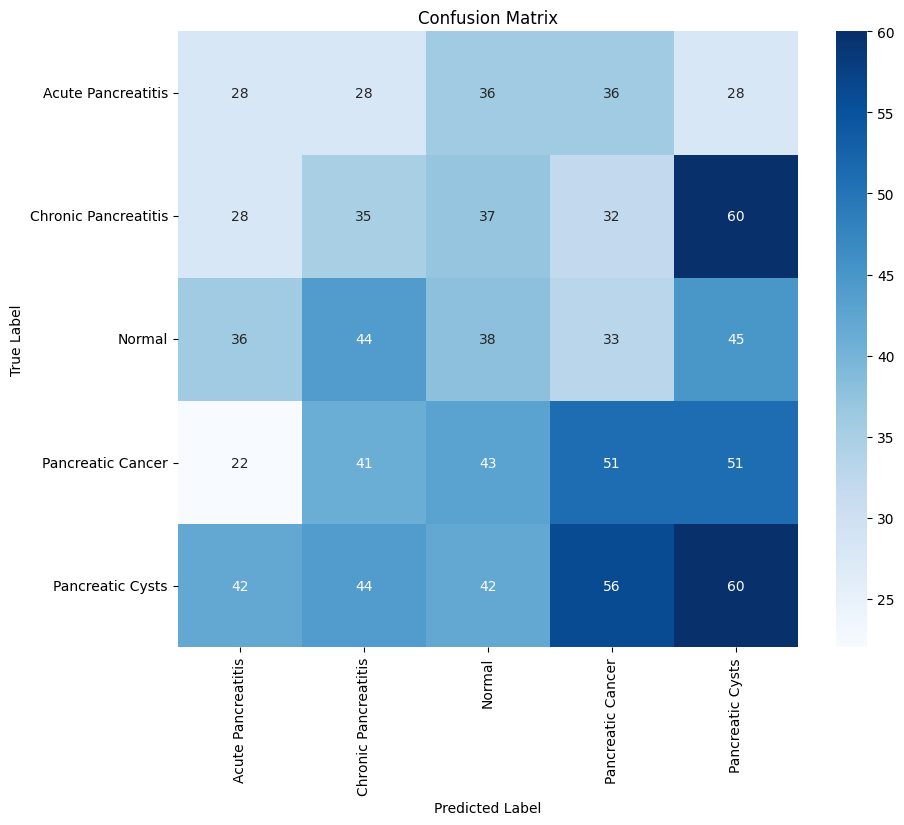

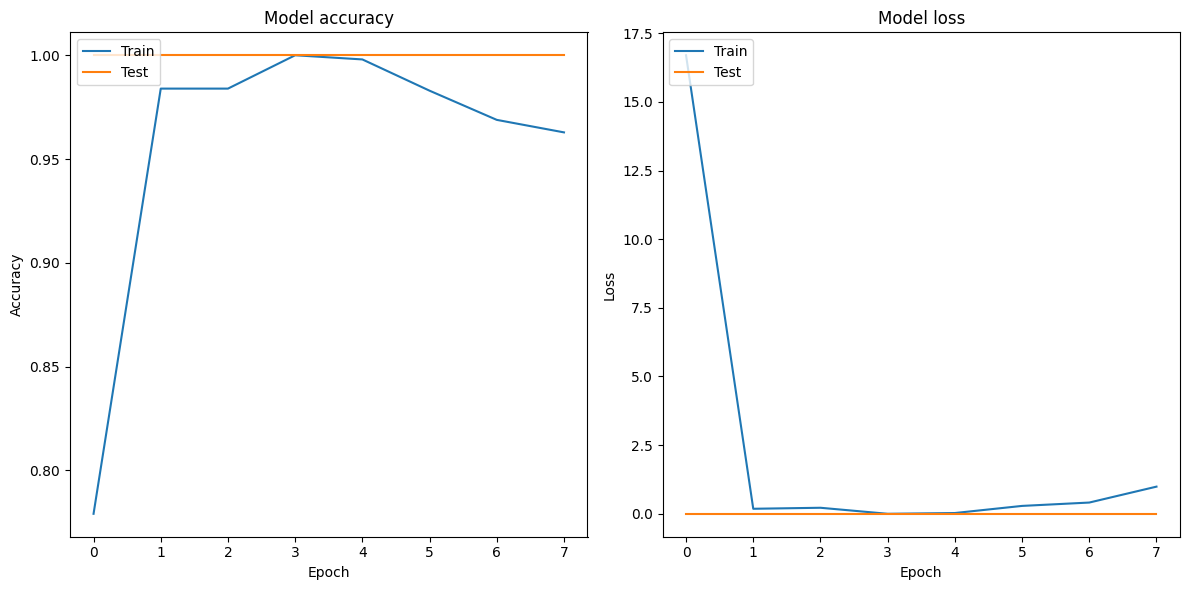

In [29]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the true labels and predicted labels for the test set
test_labels = test_set.classes
# Predict the classes for the test set
predictions = model.predict(test_set, steps=len(test_set))
predicted_classes = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_set.class_indices.keys()), yticklabels=list(test_set.class_indices.keys()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()



In [34]:


print(f"Total number of training images: {training_set.samples}")
print(f"Total number of testing images: {test_set.samples}")
print(f"Final training accuracy: {r.history['accuracy'][-1]:.4f}")


Total number of training images: 996
Total number of testing images: 996
Final training accuracy: 0.9629
